In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('...')
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.chdir('..')

import pickle

import torch
import datasets
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.modeling_outputs import CausalLMOutputWithPast

from tqdm import tqdm

from model import MemoryCell

In [ ]:
pip install scipy

In [ ]:
import pandas as pd
# df = pd.DataFrame({'text': texts})
# df.to_csv('pg19_valid_1k_chunks.csv')
texts_df = pd.read_csv('./data/pg19_valid_1k_chunks.csv', index_col=0)
texts_df.head()

In [41]:
models = ['EleutherAI/pythia-160m', 'EleutherAI/pythia-410m', 'EleutherAI/pythia-1.4b',
          'EleutherAI/pythia-2.8b',
          'allenai/OLMo-1B-0724-hf', 'facebook/opt-1.3b',
          'princeton-nlp/Sheared-LLaMA-1.3B',
          'meta-llama/Llama-3.2-1B', 'meta-llama/Llama-3.2-3B', 'meta-llama/Meta-Llama-3.1-8B']
max_lengths = [8, 16, 32, 64, 80, 96, 128, 192, 256, 640]
N_mem_tokens = 1
print(f"Текущая директория: {os.getcwd()}")
data = []
from pathlib import Path
for model_name in tqdm(models):
    for max_length in max_lengths:
        load_path = Path(f'/Users/anastasiaanke/PycharmProjects/hidden_capacity/runs/no_density/{model_name}/mem_{N_mem_tokens}_len_{max_length}.pkl')
        try:
            d = pickle.load(open(load_path, 'rb'))
            print(f'{model_name} {max_length} found')
        except:
            print(f'{model_name} {max_length} not found')
            continue
        for el in d:
            data += [{
                'model_name': model_name,
                'max_length': el['max_length'],
                'n_mem_tokens': el['n_mem_tokens'],
                'original_loss': el['original_loss'],
                'best_loss': el['best_loss'],
                'best_accuracy': el['best_accuracy'],
            }]
all_models_df = pd.DataFrame(data)
print(all_models_df)

Текущая директория: /


  0%|          | 0/10 [00:00<?, ?it/s]

EleutherAI/pythia-160m 8 found
EleutherAI/pythia-160m 16 found
EleutherAI/pythia-160m 32 found
EleutherAI/pythia-160m 64 found
EleutherAI/pythia-160m 80 found
EleutherAI/pythia-160m 96 found
EleutherAI/pythia-160m 128 found
EleutherAI/pythia-160m 192 found


100%|██████████| 10/10 [00:00<00:00, 27.49it/s]

EleutherAI/pythia-160m 256 found
EleutherAI/pythia-160m 640 found
EleutherAI/pythia-410m 8 not found
EleutherAI/pythia-410m 16 not found
EleutherAI/pythia-410m 32 not found
EleutherAI/pythia-410m 64 not found
EleutherAI/pythia-410m 80 not found
EleutherAI/pythia-410m 96 not found
EleutherAI/pythia-410m 128 not found
EleutherAI/pythia-410m 192 not found
EleutherAI/pythia-410m 256 not found
EleutherAI/pythia-410m 640 not found
EleutherAI/pythia-1.4b 8 not found
EleutherAI/pythia-1.4b 16 not found
EleutherAI/pythia-1.4b 32 not found
EleutherAI/pythia-1.4b 64 not found
EleutherAI/pythia-1.4b 80 not found
EleutherAI/pythia-1.4b 96 not found
EleutherAI/pythia-1.4b 128 not found
EleutherAI/pythia-1.4b 192 not found
EleutherAI/pythia-1.4b 256 not found
EleutherAI/pythia-1.4b 640 not found
EleutherAI/pythia-2.8b 8 not found
EleutherAI/pythia-2.8b 16 not found
EleutherAI/pythia-2.8b 32 not found
EleutherAI/pythia-2.8b 64 not found
EleutherAI/pythia-2.8b 80 not found
EleutherAI/pythia-2.8b 96 not

In [ ]:
#model_name = 'EleutherAI/pythia-160m'
# model_name = 'princeton-nlp/Sheared-LLaMA-1.3B'
model_name = 'meta-llama/Meta-Llama-3.1-8B'
tokenizer = AutoTokenizer.from_pretrained(model_name)
max_lengths = [64, 96, 128, 192, 256, 384, 512, 768, 1024, 1280, 1568, 2048, 2560, 3072]
N_mem_tokens = 1

from nltk import sent_tokenize
text_sample = texts_df['text'][0]
sentences = sent_tokenize(text_sample)
prefix_text = ' '.join(sentences[:len(sentences)//2])
suffix_text = ' '.join(sentences[len(sentences)//2:])

inp = tokenizer(suffix_text, max_length=16, truncation=True)
inp

                 model_name  max_length  n_mem_tokens  original_loss  \
0    EleutherAI/pythia-160m           8             1       4.882766   
1    EleutherAI/pythia-160m           8             1       6.018425   
2    EleutherAI/pythia-160m           8             1       3.801936   
3    EleutherAI/pythia-160m           8             1       4.751423   
4    EleutherAI/pythia-160m           8             1       5.125371   
..                      ...         ...           ...            ...   
950  EleutherAI/pythia-160m         640             1       3.986797   
951  EleutherAI/pythia-160m         640             1       3.847798   
952  EleutherAI/pythia-160m         640             1       3.379539   
953  EleutherAI/pythia-160m         640             1       3.102637   
954  EleutherAI/pythia-160m         640             1       3.548618   

     best_loss  best_accuracy  
0     0.645625       1.000000  
1     0.193772       1.000000  
2     0.443503       1.000000  
3     0

/var/folders/ps/l1q4bbws15z0jcbrgp85rh5w0000gn/T/ipykernel_46177/3515571855.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(polynomial, x_data, y_data)
/var/folders/ps/l1q4bbws15z0jcbrgp85rh5w0000gn/T/ipykernel_46177/3515571855.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(df['max_length'].unique()))


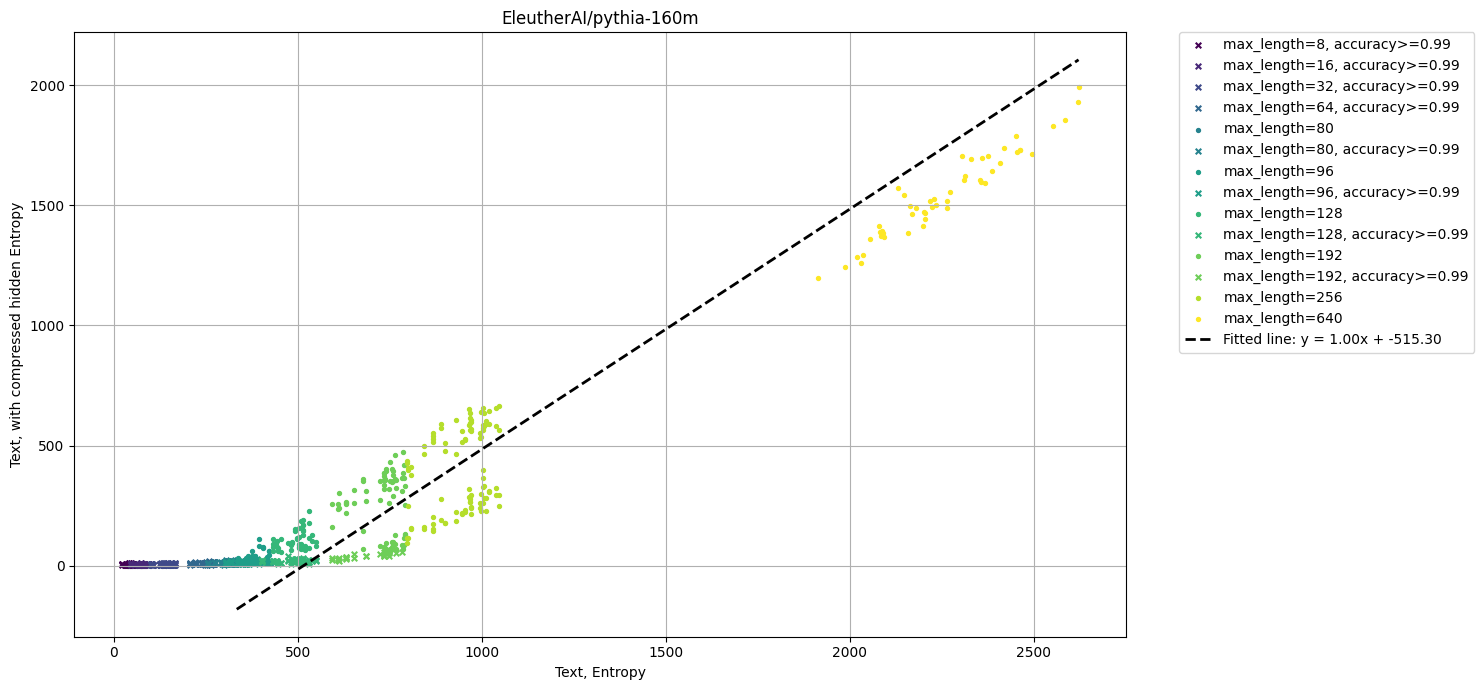

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import seaborn as sns
sns.reset_defaults()

# Assume `df` is a pandas DataFrame with columns: max_length, n_mem_tokens, original_loss, best_loss, best_accuracy, length

# Define a polynomial function for fitting (let's try a quadratic fit)
def polynomial(x, a, b):
    return 1 * x + b

s = 8
acc_thr = 0.99
model_name = 'EleutherAI/pythia-160m'
df = all_models_df[all_models_df['model_name'] == model_name]
df

# Split data based on best_accuracy threshold
d_below_thr = df[df['best_accuracy'] < acc_thr]
d_above_thr = df[df['best_accuracy'] >= acc_thr]
print(df)
# Extract data for fitting
x_data = d_below_thr['original_loss'] * d_below_thr['max_length']
y_data = d_below_thr['best_loss'] * d_below_thr['max_length']

# Use curve_fit to fit the polynomial function to the data
params, _ = curve_fit(polynomial, x_data, y_data)
a, b = params

# Generate values for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = polynomial(x_fit, *params)

# Define a colormap to assign consistent colors to each unique max_length
colors = plt.cm.get_cmap('viridis', len(df['max_length'].unique()))
color_map = {max_length: colors(i) for i, max_length in enumerate(df['max_length'].unique())}

plt.figure(figsize=(15, 7))

# Plot data points, grouped by max_length
for max_length in df['max_length'].unique():
    subset_below = d_below_thr[d_below_thr['max_length'] == max_length]
    subset_above = d_above_thr[d_above_thr['max_length'] == max_length]

    # Plot points below the accuracy threshold
    if len(subset_below) > 0:
        plt.scatter(
            subset_below['original_loss'] * max_length, 
            subset_below['best_loss'] * max_length,
            label=f'max_length={max_length}',
            s=s,
            color=color_map[max_length]
        )

    # Plot points above the accuracy threshold
    if len(subset_above) > 0:
        plt.scatter(
            subset_above['original_loss'] * max_length, 
            subset_above['best_loss'] * max_length,
            color=color_map[max_length],  # Use the same color as for the points below the threshold
            marker='x', 
            s=s * 2,
            label=f'max_length={max_length}, accuracy>={acc_thr}'
        )

# Plot the fitted curve with formula in the legend
formula_label = f'Fitted line: y = {a:.2f}x + {b:.2f}'
plt.plot(x_fit, y_fit, color='black', linestyle='--', linewidth=2, label=formula_label)

# Find the value of best_loss corresponding to the accuracy threshold
best_loss_thr = (d_above_thr['best_loss'] * d_above_thr['max_length']).max()

# Add a horizontal line for the best_loss threshold
# plt.axhline(y=best_loss_thr, color='red', linestyle=':', linewidth=2, label=f'loss threshold for accuracy >= {acc_thr}')

# Labels, legend, and grid
plt.xlabel('Text, Entropy')
plt.ylabel('Text, with compressed hidden Entropy')

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title(f'{model_name}')

plt.grid()
plt.tight_layout()  # Adjust layout to accommodate the legend outside
plt.show()


In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from transformers import AutoTokenizer

import seaborn as sns
sns.reset_defaults()

# List of models
models = ['EleutherAI/pythia-160m', 'EleutherAI/pythia-410m', 'EleutherAI/pythia-1.4b',
          'EleutherAI/pythia-2.8b',
          'allenai/OLMo-1B-0724-hf', 'facebook/opt-1.3b',
          'princeton-nlp/Sheared-LLaMA-1.3B',
          'meta-llama/Llama-3.2-1B', 'meta-llama/Llama-3.2-3B', 'meta-llama/Meta-Llama-3.1-8B']
max_lengths = [64, 96, 128, 192, 256, 384, 512, 768, 1024, 1280, 1568, 2048, 2560, 3072]
N_mem_tokens = 1

# Create subplots for each model
n_columns = 4
n_rows = (len(models) + n_columns - 1) // n_columns
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 6 * n_rows),sharey=True,sharex=True)

s = 6
acc_thr = 0.999

# Define a global color map for max_lengths
colors = plt.cm.get_cmap('viridis', len(max_lengths))
global_color_map = {max_length: colors(i) for i, max_length in enumerate(max_lengths)}

data = []
for idx, model_name in enumerate(models):

    df = all_models_df[all_models_df['model_name'] == model_name]
    if len(df) == 0:
        print(f'skipping {model_name}')
        continue

    # Split data based on best_accuracy threshold
    d_below_thr = df[df['best_accuracy'] < acc_thr]
    d_above_thr = df[df['best_accuracy'] >= acc_thr]

    # Extract data for fitting
    x_data = d_below_thr['original_loss'] * d_below_thr['max_length']
    y_data = d_below_thr['best_loss'] * d_below_thr['max_length']

    # Use curve_fit to fit the polynomial function to the data
    params, _ = curve_fit(polynomial, x_data, y_data)
    a, b = params

    # Generate values for the fitted curve
    x_fit = np.linspace(min(x_data) - 500, max(x_data) + 500, 500)
    y_fit = polynomial(x_fit, *params)

    # Define a colormap to assign consistent colors to each unique max_length
    colors = plt.cm.get_cmap('viridis', len(df['max_length'].unique()))
    color_map = {max_length: colors(i) for i, max_length in enumerate(df['max_length'].unique())}

    ax = axes.flat[idx]

    # Plot data points, grouped by max_length
    for max_length in df['max_length'].unique():
        subset_below = d_below_thr[d_below_thr['max_length'] == max_length]
        subset_above = d_above_thr[d_above_thr['max_length'] == max_length]

        # Plot points below the accuracy threshold
        if len(subset_below) > 0:
            ax.scatter(
                subset_below['original_loss'] * max_length, 
                subset_below['best_loss'] * max_length,
                label=f'length={max_length}',
                s=s,
                color=global_color_map[int(max_length)]
            )

        # Plot points above the accuracy threshold
        if len(subset_above) > 0:
            ax.scatter(
                subset_above['original_loss'] * max_length, 
                subset_above['best_loss'] * max_length,
                color=global_color_map[int(max_length)],  # Use the same color as for the points below the threshold
                marker='x', 
                s=s * 2,
                label=f'length={max_length}, accuracy>={acc_thr}'
            )

    # Plot the fitted curve with formula in the legend
    formula_label = f'Fitted line: y = {a:.2f}x + {b:.1f}'
    ax.plot(x_fit, y_fit, color='black', linestyle='--', linewidth=2, label=formula_label)

    # Find the value of best_loss corresponding to the accuracy threshold
    best_loss_thr = (d_above_thr['best_loss'] * d_above_thr['max_length']).max()

    # Add a horizontal line for the best_loss threshold
    ax.axhline(y=best_loss_thr, color='red', linestyle=':', linewidth=2, label=f'loss threshold for accuracy >= {acc_thr}')

    # Labels, legend, and grid for each subplot
    ax.set_xlabel('Text, Entropy')
    ax.set_title(f'{model_name}')
    ax.grid()

    # Move the legend outside of the plot for each subplot
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.legend(loc='upper left', fontsize=8, frameon=True, fancybox=True, framealpha=0.7)
    


# Set common ylabel for all subplots
# axes[0,0].set_ylabel('Text loss with compressed hidden * length')

# Remove any empty subplots if there are fewer models than subplots
for idx in range(len(models), n_rows * n_columns):
    fig.delaxes(axes.flat[idx])

# Set common ylabel for all subplots
fig.text(0.04, 0.5, 'Text with compressed hidden, Entropy', va='center', rotation='vertical', fontsize=10)


plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust layout to accommodate legends and labels properly
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from transformers import AutoTokenizer

# List of models
# models = ['EleutherAI/pythia-160m', 'EleutherAI/pythia-410m', 'EleutherAI/pythia-1.4b',
#            'EleutherAI/pythia-2.8b',
#           'princeton-nlp/Sheared-LLaMA-1.3B',
#           'meta-llama/Llama-3.2-1B', 'meta-llama/Llama-3.2-3B', 'meta-llama/Meta-Llama-3.1-8B']
max_lengths = [64, 96, 128, 192, 256, 384, 512, 768, 1024, 1280, 1568, 2048, 2560, 3072]
N_mem_tokens = 1

# Create subplots for each model
n_columns = 4
n_rows = (len(models) + n_columns - 1) // n_columns
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 6 * n_rows),sharey=True,sharex=True)

s = 6
acc_thr = 0.98

# Define a global color map for max_lengths
colors = plt.cm.get_cmap('viridis', len(max_lengths))
global_color_map = {max_length: colors(i) for i, max_length in enumerate(max_lengths)}

data = []
for idx, model_name in enumerate(models):

    df = all_models_df[all_models_df['model_name'] == model_name]
    if len(df) == 0:
        print(f'skipping {model_name}')
        continue

    # Split data based on best_accuracy threshold
    d_below_thr = df[df['best_accuracy'] < acc_thr]
    d_above_thr = df[df['best_accuracy'] >= acc_thr]

    # Extract data for fitting
    x_data = d_below_thr['original_loss'] * d_below_thr['max_length']
    y_data = d_below_thr['best_loss'] * d_below_thr['max_length']

    # Use curve_fit to fit the polynomial function to the data
    params, _ = curve_fit(polynomial, x_data, y_data)
    a, b = params

    # Generate values for the fitted curve
    x_fit = np.linspace(min(x_data) - 500, max(x_data) + 500, 500)
    y_fit = polynomial(x_fit, *params)

    # Define a colormap to assign consistent colors to each unique max_length
    colors = plt.cm.get_cmap('viridis', len(df['max_length'].unique()))
    color_map = {max_length: colors(i) for i, max_length in enumerate(df['max_length'].unique())}

    ax = axes.flat[idx]

    # Plot data points, grouped by max_length
    for max_length in df['max_length'].unique():
        subset_below = d_below_thr[d_below_thr['max_length'] == max_length]
        subset_above = d_above_thr[d_above_thr['max_length'] == max_length]

        # Plot points below the accuracy threshold
        if len(subset_below) > 0:
            ax.scatter(
                subset_below['original_loss'], 
                subset_below['best_loss'],
                label=f'length={max_length}',
                s=s,
                color=global_color_map[int(max_length)]
            )

        # Plot points above the accuracy threshold
        if len(subset_above) > 0:
            ax.scatter(
                subset_above['original_loss'], 
                subset_above['best_loss'],
                color=global_color_map[int(max_length)],  # Use the same color as for the points below the threshold
                marker='x', 
                s=s * 2,
                label=f'length={max_length}, accuracy>={acc_thr}'
            )

    # Plot the fitted curve with formula in the legend
    formula_label = f'Fitted line: y = {a:.3f}x + {b:.1f}'
    # ax.plot(x_fit, y_fit, color='black', linestyle='--', linewidth=2, label=formula_label)

    # Find the value of best_loss corresponding to the accuracy threshold
    best_loss_thr = (d_above_thr['best_loss'] * d_above_thr['max_length']).max()

    # Add a horizontal line for the best_loss threshold
    # ax.axhline(y=best_loss_thr, color='red', linestyle=':', linewidth=2, label=f'loss threshold for accuracy >= {acc_thr}')

    # Labels, legend, and grid for each subplot
    ax.set_xlabel('Text, loss')
    ax.set_title(f'{model_name}')
    ax.grid()

    # Move the legend outside of the plot for each subplot
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=8, frameon=True, fancybox=True, framealpha=0.7)
    


# Set common ylabel for all subplots
# axes[0,0].set_ylabel('Text loss with compressed hidden * length')

# Remove any empty subplots if there are fewer models than subplots
for idx in range(len(models), n_rows * n_columns):
    fig.delaxes(axes.flat[idx])

# Set common ylabel for all subplots
fig.text(0.04, 0.5, 'Text with compressed hidden, loss', va='center', rotation='vertical', fontsize=10)


plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust layout to accommodate legends and labels properly
plt.show()


In [ ]:
all_models_df['loss_diff']  = (all_models_df['original_loss'] - all_models_df['best_loss']) * all_models_df['max_length']
all_models_df['original_CE']  = all_models_df['original_loss'] * all_models_df['max_length']

In [ ]:
all_models_df

In [ ]:
all_models_df.groupby('model_name').mean()['original_loss']

In [ ]:
import seaborn as sns
pd.set_option('display.max_rows', 200)
sns.set_theme()
models_by_len_df = all_models_df.groupby(['model_name', 'max_length'], as_index=False).mean()
for model_name in models:
    model_df = models_by_len_df[models_by_len_df['model_name']==model_name]
    plt.plot(model_df['max_length'], model_df['original_loss'], label=model_name)
plt.title('model loss vs length')
plt.xlabel('length')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
models_by_len_df[models_by_len_df['max_length'] == 512].sort_values('original_CE', ascending=False)

In [ ]:
all_models_df['original_loss_mean'] = all_models_df.groupby('model_name')['original_loss'].transform('mean')

In [ ]:
all_models_df['original_loss_mean_by_len'] = all_models_df.apply(lambda x: models_by_len_df[(models_by_len_df['model_name'] == x['model_name']) & (models_by_len_df['max_length'] == x['max_length'])]['original_loss'].item(), axis=1)


In [ ]:
all_models_df

In [ ]:
all_models_df['XXX'] = all_models_df['loss_diff'] / (all_models_df['original_loss'])
all_models_df

In [ ]:
# ok, we found compression value for a single model (loss_diff) that is stable across all lengths.

# but how to generalize it across all models? use some model characteristic for it?

In [ ]:
import seaborn as sns

In [ ]:
sns.relplot(data=all_models_df[all_models_df['best_accuracy'] < 0.95],
            x='XXX', y='max_length', hue='model_name', alpha=0.8)
plt.show()

In [ ]:
plt.figure(figsize=(10,17))
sns.boxplot(data=all_models_df[all_models_df['best_accuracy'] < 0.99], x='XXX', y='model_name', hue='max_length')
plt.show()

In [ ]:
tmp_df = all_models_df[(all_models_df['model_name'] == 'meta-llama/Llama-3.2-3B') & (all_models_df['best_accuracy'] < 0.95)]
sns.relplot(data=all_models_df[all_models_df['best_accuracy'] < 0.95],
            x='XXX', y='max_length', hue='model_name', alpha=0.8)

In [ ]:
sns.relplot(data=all_models_df[all_models_df['best_accuracy'] < 0.99], x='original_loss', y='max_length', hue='model_name', alpha=0.8)